# Importing Dataset

In [46]:
import os

In [47]:
train2=os.listdir("/kaggle/input/dermnet/train")

In [48]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, 
                             accuracy_score)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, 
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, accuracy_score)
# Base Libraries
from tensorflow.keras.applications import  VGG19,EfficientNetB1,VGG16,InceptionV3,ResNet50,EfficientNetB3,EfficientNetB2,EfficientNetB0
from tensorflow.keras.models import Model
from keras.applications.vgg16 import preprocess_input
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.pipeline import Pipeline
# Feature Selection


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [49]:
train2

['Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Acne and Rosacea Photos',
 'Systemic Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Vascular Tumors',
 'Urticaria Hives',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Herpes HPV and other STDs Photos',
 'Seborrheic Keratoses and other Benign Tumors',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Vasculitis Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Warts Molluscum and other Viral Infections']

In [50]:
cat2=['Melanoma Skin Cancer Nevi and Moles']

In [51]:
cat=['Acne and Rosacea Photos',
 'Normal',
 'vitiligo',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
     'Melanoma Skin Cancer Nevi and Moles',
 'Eczema Photos']

In [52]:
def data_dictionary():
    path_train="/kaggle/input/skindatasets/skin/train/"
    path_test="/kaggle/input/dermnet/train/"
    list_train=cat#os.listdir(path_train)
    list_train1=cat2
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j            
            if img_path_train!="/kaggle/input/skindatasets/skin/train/Normal/34.avif":
                
                train_dictionary["image_path"].append(img_path_train)
                train_dictionary['target'].append(k) 
        k+=1
    for i in list_train1:
        path_disease_test=path_test+i
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_test:
            img_path_train=path_disease_test+"/"+j            
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(4)
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [53]:
train=data_dictionary()

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7330 entries, 0 to 7329
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  7330 non-null   object
 1   target      7330 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 114.7+ KB


In [55]:


import cv2
images=[]
label=[]
for i in train['image_path']:
    if i!="/kaggle/input/skindatasets/skin/train/Normal/34.avif":
        img=cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(180,180))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img=cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
        #img=resize_and_rescale(img)
        images.append(img)


# Data Visualization

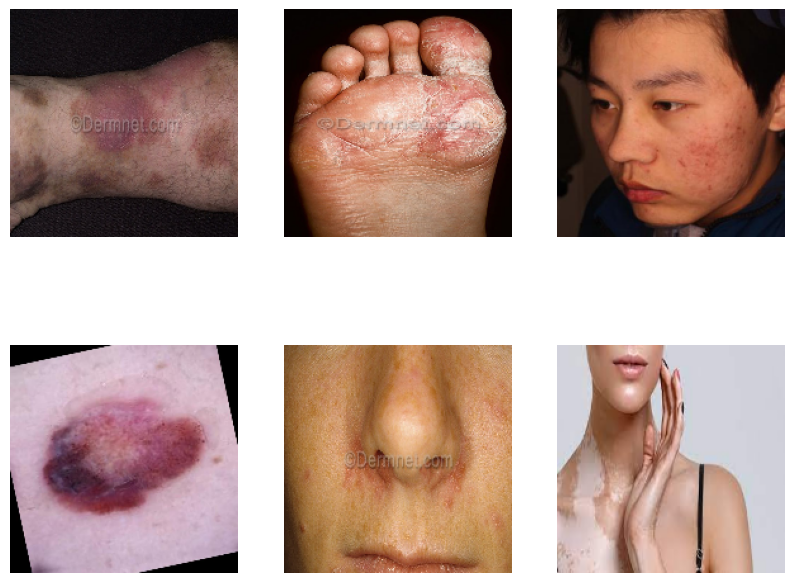

In [56]:

# Create a list of example inputs to our Gradio demo
example_list = [image for image in random.sample(images, k=6)]

# Plot the images in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

for ax, img_array in zip(axes.ravel(), example_list):
    ax.imshow(img_array)
    ax.axis('off')

plt.show()


In [57]:
label=train['target']

In [58]:
len(label)

7330

In [59]:
len(images)

7330

# Preprocessing

In [60]:
import numpy as np
import pandas as pd

In [61]:
data=np.array(images)


In [62]:
labels=np.array(label)

In [63]:
data.shape

(7330, 180, 180, 3)

In [64]:
label.shape

(7330,)

In [66]:
!pip install sklearn_relief

# Transfer Learning using EfficientNetB3 for feature extraction

In [67]:

eff3_model = EfficientNetB3(weights = 'imagenet',  include_top = False, input_shape = (180, 180, 3)) 

In [68]:

# let's make all layers non-trainable
for layer in eff3_model.layers : 
    layer.trainable = False

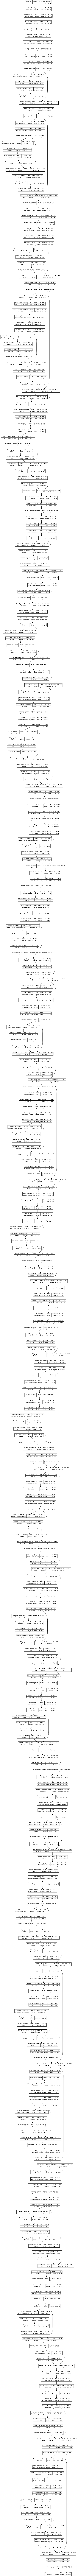

In [69]:
from keras.utils.vis_utils import plot_model
plot_model(eff3_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Creating Output Layer

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense


In [71]:
model=Sequential([ 
                   
                    Dense(200,activation='relu'),
                  Dense(170,activation='relu'),
                  Dense(6,activation='softmax'),

])

In [72]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [73]:
mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)

In [74]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [75]:
from sklearn.model_selection import train_test_split 

In [76]:
import keras
acc=[]
num_classes = 6
label = keras.utils.to_categorical(label, num_classes)

In [77]:
label.shape


(7330, 6)

feature extraction and splitting

In [78]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=np.random.randint(1, 1000, 1)[0])


features_train_eff3 = eff3_model.predict(x_train)
features_test_eff3 = eff3_model.predict(x_test)
num_train = x_train.shape[0]
num_test = x_test.shape[0]


x_test_eff3 = features_test_eff3.reshape(num_test, -1)
x_train_eff3 = features_train_eff3.reshape(num_train, -1)


46/46 [==============================] - 3s 69ms/step


In [79]:
x_train_eff3.shape

(5864, 55296)

In [80]:
x_test_eff3.shape

(1466, 55296)

# Model Training

In [81]:
%%time


# checkpoint to save best model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Specify the number of epochs and batch size
epochs = 20  # Adjust the number of epochs as needed
batch_size = 32

# Train the model
history = model.fit(
    x_train_eff3,y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_eff3,y_test),
     callbacks=callbacks_list
                                )


# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test_eff3,y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

                               

Epoch 1/20
180/184 [============================>.] - ETA: 0s - loss: 0.8767 - accuracy: 0.7542
Epoch 1: val_accuracy improved from -inf to 0.83970, saving model to model_weights.h5
184/184 [==============================] - 4s 16ms/step - loss: 0.8661 - accuracy: 0.7570 - val_loss: 0.4622 - val_accuracy: 0.8397
Epoch 2/20
183/184 [============================>.] - ETA: 0s - loss: 0.3165 - accuracy: 0.8839
Epoch 2: val_accuracy did not improve from 0.83970
184/184 [==============================] - 2s 9ms/step - loss: 0.3166 - accuracy: 0.8839 - val_loss: 0.5488 - val_accuracy: 0.8336
Epoch 3/20
180/184 [============================>.] - ETA: 0s - loss: 0.2190 - accuracy: 0.9408
Epoch 3: val_accuracy did not improve from 0.83970
184/184 [==============================] - 2s 10ms/step - loss: 0.2177 - accuracy: 0.9405 - val_loss: 0.6158 - val_accuracy: 0.8206
Epoch 4/20
181/184 [============================>.] - ETA: 0s - loss: 0.0927 - accuracy: 0.9663
Epoch 4: val_accuracy improved fr

# Saving Model with best weights

In [90]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [82]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix


In [83]:
y_pred=model.predict(x_test_eff3)

46/46 [==============================] - 0s 4ms/step


In [84]:
y_pred2=np.argmax(y_pred, axis=1)
y_pred2

array([5, 0, 0, ..., 4, 4, 5])

In [85]:
y_test=np.argmax(y_test, axis=1)
y_test

array([5, 1, 0, ..., 4, 4, 5])

# Evaluation

In [86]:
confusion_matrix=classification_report(y_test,y_pred2)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       225
           1       0.94      0.90      0.92       164
           2       0.97      0.97      0.97       315
           3       0.78      0.78      0.78       261
           4       0.93      0.92      0.92       244
           5       0.81      0.79      0.80       257

    accuracy                           0.88      1466
   macro avg       0.88      0.88      0.88      1466
weighted avg       0.88      0.88      0.88      1466



# Prediction

In [89]:
import cv2
import numpy as np
from keras.models import load_model
from tensorflow.keras.models import model_from_json
# load model

model_json_file = 'model.json'
model_weights_file = 'model_weights.h5'
with open(model_json_file, "r") as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(model_weights_file)

# Define a function to predict skin diseases
def predict_skin_disease(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))
    img = np.array(img)
    img = img.reshape(1, 180, 180, 3)
    x_t=eff3_model.predict(img)
    x_t=x_t.reshape(1,-1)
    # Make the prediction
    predictions = loaded_model.predict(x_t)
    
    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)
    
    # Define class names based on your dataset
    class_names = ['Acnes', 'Healthy', 'Vitiligo', 'Fungal Infections',
                   'Melanoma Skin Cancer and Moles', 'Eczema']
    
    # Get the predicted class name
    predicted_class_name = class_names[predicted_class_index]
    
    return predicted_class_name

#usage:
image_path = '/kaggle/input/skindatasets/skin/test/Normal/0_0_aidai_0074.jpg'  # Replace with the path to your test image
predicted_disease = predict_skin_disease(image_path)
print(f"Predicted Skin Disease: {predicted_disease}")


1/1 [==============================] - 0s 22ms/step
Predicted Skin Disease: Normal


***We've achieved an impressive 88% accuracy, but there's room for improvement by expanding our dataset and continuing our experimentation with various models. Among the models we've tested, including ResNet, VGG19, VGG18, and EfficientNetB1 and B2, it's worth noting that EfficientNetB3 consistently delivers the highest accuracy.***